In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 41.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.

In [ ]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [ ]:
# Spanish corpus of 44 texts from ECHR (automatic translations with manual annotations)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='ES-manual.tsv', column_delimiter=' ',
                                    dev_file=None,
                                    test_file=None
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2023-11-23 09:43:45,350 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2023-11-23 09:43:45,352 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-manual-PER.tsv
2023-11-23 09:43:45,354 Dev: None
2023-11-23 09:43:45,356 Test: None
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1309,
        "number_of_documents_per_class": {
            "CODE": 73,
            "LOC": 350,
            "NATIONALITY": 90,
            "PER": 159,
            "DATE": 627,
            "LEGAL_PROFESSIONAL": 129,
            "ORG": 106,
            "QUANTITY": 165,
            "TIME": 2,
            "CURRENCY": 22,
            "ETHNIC_CATEGORY": 19
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 36072,
            "min": 1,
            "max": 556,
            "avg": 27.556913674560732
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_docume

In [ ]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-multi")

pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

2023-11-23 09:44:27,224 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [ ]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2023-11-23 09:44:27,881 Computing label dictionary. Progress:


1309it [00:00, 45376.62it/s]

2023-11-23 09:44:27,917 Dictionary created for label 'ner' with 12 values: DATE (seen 627 times), LOC (seen 350 times), QUANTITY (seen 165 times), PER (seen 159 times), LEGAL_PROFESSIONAL (seen 129 times), ORG (seen 106 times), NATIONALITY (seen 90 times), CODE (seen 73 times), CURRENCY (seen 22 times), ETHNIC_CATEGORY (seen 19 times), TIME (seen 2 times)
[b'<unk>', b'DATE', b'LOC', b'QUANTITY', b'PER', b'LEGAL_PROFESSIONAL', b'ORG', b'NATIONALITY', b'CODE', b'CURRENCY', b'ETHNIC_CATEGORY', b'TIME']


In [ ]:
print(tagger.label_dictionary.idx2item)

[b'<unk>', b'O', b'B-PER', b'E-PER', b'S-LOC', b'B-MISC', b'I-MISC', b'E-MISC', b'S-PER', b'B-ORG', b'E-ORG', b'S-ORG', b'I-ORG', b'B-LOC', b'E-LOC', b'S-MISC', b'I-PER', b'I-LOC', b'<START>', b'<STOP>']


In [ ]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2023-11-23 09:44:27,934 SequenceTagger predicts: Dictionary with 45 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-PER, B-PER, E-PER, I-PER, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-TIME, B-TIME, E-TIME, I-TIME


In [ ]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [ ]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=19,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2023-11-23 09:44:28,876 ----------------------------------------------------------------------------------------------------
2023-11-23 09:44:28,877 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '/home/alan/.flair/embeddings/glove.gensim'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): WordEmbeddings(
      '/home/alan/.flair/embeddings/de-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_

100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

2023-11-23 09:44:54,201 Evaluating as a multi-label problem: False
2023-11-23 09:44:54,223 DEV : loss 0.47594958543777466 - f1-score (micro avg)  0.2357
2023-11-23 09:44:54,246 BAD EPOCHS (no improvement): 0
2023-11-23 09:44:54,250 saving best model


2023-11-23 09:45:00,084 ----------------------------------------------------------------------------------------------------
2023-11-23 09:45:00,967 epoch 2 - iter 4/41 - loss 0.50597851 - time (sec): 0.88 - samples/sec: 4299.57 - lr: 0.100000
2023-11-23 09:45:03,182 epoch 2 - iter 8/41 - loss 0.49694962 - time (sec): 3.10 - samples/sec: 2319.45 - lr: 0.100000
2023-11-23 09:45:04,588 epoch 2 - iter 12/41 - loss 0.47732152 - time (sec): 4.50 - samples/sec: 2371.22 - lr: 0.100000
2023-11-23 09:45:06,001 epoch 2 - iter 16/41 - loss 0.48034366 - time (sec): 5.92 - samples/sec: 2370.24 - lr: 0.100000
2023-11-23 09:45:07,457 epoch 2 - iter 20/41 - loss 0.46981835 - time (sec): 7.37 - samples/sec: 2388.92 - lr: 0.100000
2023-11-23 09:45:09,253 epoch 2 - iter 24/41 - loss 0.45622108 - time (sec): 9.17 - samples/sec: 2281.98 - lr: 0.100000
2023-11-23 09:45:11,729 epoch 2 - iter 28/41 - loss 0.47707966 - time (sec): 11.64 - samples/sec: 2128.64 - lr: 0.100000
2023-11-23 09:45:13,213 epoch 2 - it

100%|██████████| 5/5 [00:01<00:00,  3.37it/s]

2023-11-23 09:45:18,587 Evaluating as a multi-label problem: False


2023-11-23 09:45:18,607 DEV : loss 0.26534953713417053 - f1-score (micro avg)  0.4278
2023-11-23 09:45:18,631 BAD EPOCHS (no improvement): 0
2023-11-23 09:45:18,636 saving best model
2023-11-23 09:45:24,470 ----------------------------------------------------------------------------------------------------
2023-11-23 09:45:25,367 epoch 3 - iter 4/41 - loss 0.37847194 - time (sec): 0.90 - samples/sec: 4073.60 - lr: 0.100000
2023-11-23 09:45:28,088 epoch 3 - iter 8/41 - loss 0.34721182 - time (sec): 3.62 - samples/sec: 2007.57 - lr: 0.100000
2023-11-23 09:45:29,443 epoch 3 - iter 12/41 - loss 0.33790800 - time (sec): 4.97 - samples/sec: 2136.57 - lr: 0.100000
2023-11-23 09:45:30,779 epoch 3 - iter 16/41 - loss 0.34149458 - time (sec): 6.31 - samples/sec: 2226.52 - lr: 0.100000
2023-11-23 09:45:32,198 epoch 3 - iter 20/41 - loss 0.31393249 - time (sec): 7.73 - samples/sec: 2265.56 - lr: 0.100000
2023-11-23 09:45:33,745 epoch 3 - iter 24/41 - loss 0.31209021 - time (sec): 9.27 - samples/se

100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

2023-11-23 09:45:42,588 Evaluating as a multi-label problem: False


2023-11-23 09:45:42,605 DEV : loss 0.20489716529846191 - f1-score (micro avg)  0.5378
2023-11-23 09:45:42,627 BAD EPOCHS (no improvement): 0
2023-11-23 09:45:42,631 saving best model
2023-11-23 09:45:48,877 ----------------------------------------------------------------------------------------------------
2023-11-23 09:45:50,564 epoch 4 - iter 4/41 - loss 0.47883383 - time (sec): 1.68 - samples/sec: 2705.84 - lr: 0.100000
2023-11-23 09:45:53,368 epoch 4 - iter 8/41 - loss 0.41321984 - time (sec): 4.49 - samples/sec: 1795.26 - lr: 0.100000
2023-11-23 09:45:54,679 epoch 4 - iter 12/41 - loss 0.35748255 - time (sec): 5.80 - samples/sec: 1885.38 - lr: 0.100000
2023-11-23 09:45:56,208 epoch 4 - iter 16/41 - loss 0.33256877 - time (sec): 7.33 - samples/sec: 1999.99 - lr: 0.100000
2023-11-23 09:45:57,683 epoch 4 - iter 20/41 - loss 0.30845005 - time (sec): 8.80 - samples/sec: 2044.06 - lr: 0.100000
2023-11-23 09:45:59,150 epoch 4 - iter 24/41 - loss 0.29223999 - time (sec): 10.27 - samples/s

100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

2023-11-23 09:46:07,666 Evaluating as a multi-label problem: False


2023-11-23 09:46:07,685 DEV : loss 0.13904549181461334 - f1-score (micro avg)  0.6595
2023-11-23 09:46:07,706 BAD EPOCHS (no improvement): 0
2023-11-23 09:46:07,709 saving best model
2023-11-23 09:46:13,651 ----------------------------------------------------------------------------------------------------
2023-11-23 09:46:14,456 epoch 5 - iter 4/41 - loss 0.19497787 - time (sec): 0.80 - samples/sec: 4296.43 - lr: 0.100000
2023-11-23 09:46:16,911 epoch 5 - iter 8/41 - loss 0.19451803 - time (sec): 3.26 - samples/sec: 2079.83 - lr: 0.100000
2023-11-23 09:46:19,067 epoch 5 - iter 12/41 - loss 0.25095432 - time (sec): 5.41 - samples/sec: 1974.98 - lr: 0.100000
2023-11-23 09:46:20,608 epoch 5 - iter 16/41 - loss 0.24084193 - time (sec): 6.95 - samples/sec: 2049.59 - lr: 0.100000
2023-11-23 09:46:22,270 epoch 5 - iter 20/41 - loss 0.22927163 - time (sec): 8.62 - samples/sec: 2069.21 - lr: 0.100000
2023-11-23 09:46:23,798 epoch 5 - iter 24/41 - loss 0.22301254 - time (sec): 10.14 - samples/s

100%|██████████| 5/5 [00:01<00:00,  3.99it/s]

2023-11-23 09:46:31,926 Evaluating as a multi-label problem: False
2023-11-23 09:46:31,941 DEV : loss 0.11239540576934814 - f1-score (micro avg)  0.7797


2023-11-23 09:46:31,963 BAD EPOCHS (no improvement): 0
2023-11-23 09:46:31,967 saving best model
2023-11-23 09:46:37,999 ----------------------------------------------------------------------------------------------------
2023-11-23 09:46:39,640 epoch 6 - iter 4/41 - loss 0.36374888 - time (sec): 1.60 - samples/sec: 2293.33 - lr: 0.100000
2023-11-23 09:46:41,319 epoch 6 - iter 8/41 - loss 0.27715377 - time (sec): 3.28 - samples/sec: 2157.41 - lr: 0.100000
2023-11-23 09:46:42,669 epoch 6 - iter 12/41 - loss 0.24123421 - time (sec): 4.63 - samples/sec: 2308.02 - lr: 0.100000
2023-11-23 09:46:43,894 epoch 6 - iter 16/41 - loss 0.22443596 - time (sec): 5.85 - samples/sec: 2343.77 - lr: 0.100000
2023-11-23 09:46:45,377 epoch 6 - iter 20/41 - loss 0.20724771 - time (sec): 7.33 - samples/sec: 2347.16 - lr: 0.100000
2023-11-23 09:46:46,909 epoch 6 - iter 24/41 - loss 0.19644806 - time (sec): 8.87 - samples/sec: 2349.03 - lr: 0.100000
2023-11-23 09:46:48,537 epoch 6 - iter 28/41 - loss 0.193489

100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

2023-11-23 09:46:55,393 Evaluating as a multi-label problem: False
2023-11-23 09:46:55,406 DEV : loss 0.11419882625341415 - f1-score (micro avg)  0.7697


2023-11-23 09:46:55,428 BAD EPOCHS (no improvement): 1
2023-11-23 09:46:55,431 ----------------------------------------------------------------------------------------------------
2023-11-23 09:46:57,107 epoch 7 - iter 4/41 - loss 0.27167828 - time (sec): 1.67 - samples/sec: 2325.75 - lr: 0.100000
2023-11-23 09:46:58,595 epoch 7 - iter 8/41 - loss 0.20426877 - time (sec): 3.16 - samples/sec: 2280.89 - lr: 0.100000
2023-11-23 09:47:00,242 epoch 7 - iter 12/41 - loss 0.18538428 - time (sec): 4.81 - samples/sec: 2206.78 - lr: 0.100000
2023-11-23 09:47:01,698 epoch 7 - iter 16/41 - loss 0.17395103 - time (sec): 6.27 - samples/sec: 2197.80 - lr: 0.100000
2023-11-23 09:47:03,154 epoch 7 - iter 20/41 - loss 0.17032404 - time (sec): 7.72 - samples/sec: 2272.34 - lr: 0.100000
2023-11-23 09:47:04,605 epoch 7 - iter 24/41 - loss 0.16500951 - time (sec): 9.17 - samples/sec: 2269.97 - lr: 0.100000
2023-11-23 09:47:06,087 epoch 7 - iter 28/41 - loss 0.16544425 - time (sec): 10.65 - samples/sec: 2264

100%|██████████| 5/5 [00:01<00:00,  3.96it/s]

2023-11-23 09:47:12,616 Evaluating as a multi-label problem: False
2023-11-23 09:47:12,632 DEV : loss 0.09480170905590057 - f1-score (micro avg)  0.861


2023-11-23 09:47:12,654 BAD EPOCHS (no improvement): 0
2023-11-23 09:47:12,658 saving best model
2023-11-23 09:47:20,699 ----------------------------------------------------------------------------------------------------
2023-11-23 09:47:21,460 epoch 8 - iter 4/41 - loss 0.15220872 - time (sec): 0.76 - samples/sec: 4419.13 - lr: 0.100000
2023-11-23 09:47:23,274 epoch 8 - iter 8/41 - loss 0.14897612 - time (sec): 2.57 - samples/sec: 2869.13 - lr: 0.100000
2023-11-23 09:47:24,540 epoch 8 - iter 12/41 - loss 0.13464540 - time (sec): 3.84 - samples/sec: 2794.11 - lr: 0.100000
2023-11-23 09:47:25,804 epoch 8 - iter 16/41 - loss 0.13220608 - time (sec): 5.10 - samples/sec: 2723.23 - lr: 0.100000
2023-11-23 09:47:27,586 epoch 8 - iter 20/41 - loss 0.12466287 - time (sec): 6.89 - samples/sec: 2520.07 - lr: 0.100000
2023-11-23 09:47:29,030 epoch 8 - iter 24/41 - loss 0.12516898 - time (sec): 8.33 - samples/sec: 2507.35 - lr: 0.100000
2023-11-23 09:47:30,471 epoch 8 - iter 28/41 - loss 0.128110

100%|██████████| 5/5 [00:01<00:00,  3.68it/s]

2023-11-23 09:47:37,819 Evaluating as a multi-label problem: False


2023-11-23 09:47:37,836 DEV : loss 0.0839199647307396 - f1-score (micro avg)  0.841
2023-11-23 09:47:37,859 BAD EPOCHS (no improvement): 1
2023-11-23 09:47:37,863 ----------------------------------------------------------------------------------------------------
2023-11-23 09:47:38,749 epoch 9 - iter 4/41 - loss 0.11022473 - time (sec): 0.88 - samples/sec: 3968.54 - lr: 0.100000
2023-11-23 09:47:40,326 epoch 9 - iter 8/41 - loss 0.11917206 - time (sec): 2.46 - samples/sec: 2882.63 - lr: 0.100000
2023-11-23 09:47:41,680 epoch 9 - iter 12/41 - loss 0.11209753 - time (sec): 3.82 - samples/sec: 2754.22 - lr: 0.100000
2023-11-23 09:47:43,146 epoch 9 - iter 16/41 - loss 0.10972342 - time (sec): 5.28 - samples/sec: 2679.47 - lr: 0.100000
2023-11-23 09:47:44,495 epoch 9 - iter 20/41 - loss 0.10411168 - time (sec): 6.63 - samples/sec: 2627.27 - lr: 0.100000
2023-11-23 09:47:46,957 epoch 9 - iter 24/41 - loss 0.13631655 - time (sec): 9.09 - samples/sec: 2355.34 - lr: 0.100000
2023-11-23 09:47:4

100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

2023-11-23 09:47:54,973 Evaluating as a multi-label problem: False
2023-11-23 09:47:54,988 DEV : loss 0.07872830331325531 - f1-score (micro avg)  0.8665


2023-11-23 09:47:55,009 BAD EPOCHS (no improvement): 0
2023-11-23 09:47:55,014 saving best model
2023-11-23 09:48:00,825 ----------------------------------------------------------------------------------------------------
2023-11-23 09:48:01,609 epoch 10 - iter 4/41 - loss 0.10305295 - time (sec): 0.78 - samples/sec: 4435.07 - lr: 0.100000
2023-11-23 09:48:04,755 epoch 10 - iter 8/41 - loss 0.11054276 - time (sec): 3.93 - samples/sec: 1746.82 - lr: 0.100000
2023-11-23 09:48:06,113 epoch 10 - iter 12/41 - loss 0.11427023 - time (sec): 5.29 - samples/sec: 1955.99 - lr: 0.100000
2023-11-23 09:48:08,297 epoch 10 - iter 16/41 - loss 0.13838902 - time (sec): 7.47 - samples/sec: 1910.36 - lr: 0.100000
2023-11-23 09:48:09,628 epoch 10 - iter 20/41 - loss 0.12940951 - time (sec): 8.80 - samples/sec: 2000.45 - lr: 0.100000
2023-11-23 09:48:11,162 epoch 10 - iter 24/41 - loss 0.12590782 - time (sec): 10.34 - samples/sec: 2088.49 - lr: 0.100000
2023-11-23 09:48:12,597 epoch 10 - iter 28/41 - loss 

100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

2023-11-23 09:48:19,502 Evaluating as a multi-label problem: False


2023-11-23 09:48:19,523 DEV : loss 0.06717094033956528 - f1-score (micro avg)  0.9005
2023-11-23 09:48:19,556 BAD EPOCHS (no improvement): 0
2023-11-23 09:48:19,562 saving best model
2023-11-23 09:48:25,951 ----------------------------------------------------------------------------------------------------
2023-11-23 09:48:26,735 epoch 11 - iter 4/41 - loss 0.06653377 - time (sec): 0.78 - samples/sec: 4297.44 - lr: 0.100000
2023-11-23 09:48:28,782 epoch 11 - iter 8/41 - loss 0.09519689 - time (sec): 2.83 - samples/sec: 2365.50 - lr: 0.100000
2023-11-23 09:48:30,314 epoch 11 - iter 12/41 - loss 0.10324432 - time (sec): 4.36 - samples/sec: 2365.55 - lr: 0.100000
2023-11-23 09:48:31,805 epoch 11 - iter 16/41 - loss 0.09906756 - time (sec): 5.85 - samples/sec: 2361.28 - lr: 0.100000
2023-11-23 09:48:33,724 epoch 11 - iter 20/41 - loss 0.09104575 - time (sec): 7.77 - samples/sec: 2230.80 - lr: 0.100000
2023-11-23 09:48:36,020 epoch 11 - iter 24/41 - loss 0.10769439 - time (sec): 10.07 - sam

100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

2023-11-23 09:48:44,310 Evaluating as a multi-label problem: False
2023-11-23 09:48:44,328 DEV : loss 0.0742553249001503 - f1-score (micro avg)  0.8905
2023-11-23 09:48:44,356 BAD EPOCHS (no improvement): 1
2023-11-23 09:48:44,360 ----------------------------------------------------------------------------------------------------


2023-11-23 09:48:45,174 epoch 12 - iter 4/41 - loss 0.07440924 - time (sec): 0.81 - samples/sec: 4245.50 - lr: 0.100000
2023-11-23 09:48:46,624 epoch 12 - iter 8/41 - loss 0.08310856 - time (sec): 2.26 - samples/sec: 3153.65 - lr: 0.100000
2023-11-23 09:48:48,124 epoch 12 - iter 12/41 - loss 0.09341625 - time (sec): 3.76 - samples/sec: 2787.58 - lr: 0.100000
2023-11-23 09:48:49,603 epoch 12 - iter 16/41 - loss 0.09300867 - time (sec): 5.24 - samples/sec: 2707.51 - lr: 0.100000
2023-11-23 09:48:52,061 epoch 12 - iter 20/41 - loss 0.10708296 - time (sec): 7.70 - samples/sec: 2336.32 - lr: 0.100000
2023-11-23 09:48:53,419 epoch 12 - iter 24/41 - loss 0.10126957 - time (sec): 9.06 - samples/sec: 2378.55 - lr: 0.100000
2023-11-23 09:48:54,884 epoch 12 - iter 28/41 - loss 0.09562045 - time (sec): 10.52 - samples/sec: 2371.02 - lr: 0.100000
2023-11-23 09:48:56,439 epoch 12 - iter 32/41 - loss 0.09235942 - time (sec): 12.08 - samples/sec: 2357.17 - lr: 0.100000
2023-11-23 09:48:57,946 epoch 12

100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

2023-11-23 09:49:01,550 Evaluating as a multi-label problem: False
2023-11-23 09:49:01,564 DEV : loss 0.05699194222688675 - f1-score (micro avg)  0.8905


2023-11-23 09:49:01,587 BAD EPOCHS (no improvement): 2
2023-11-23 09:49:01,591 ----------------------------------------------------------------------------------------------------
2023-11-23 09:49:02,495 epoch 13 - iter 4/41 - loss 0.09360698 - time (sec): 0.90 - samples/sec: 3652.74 - lr: 0.100000
2023-11-23 09:49:04,094 epoch 13 - iter 8/41 - loss 0.11230520 - time (sec): 2.50 - samples/sec: 2681.78 - lr: 0.100000
2023-11-23 09:49:05,782 epoch 13 - iter 12/41 - loss 0.09677431 - time (sec): 4.19 - samples/sec: 2538.37 - lr: 0.100000
2023-11-23 09:49:08,057 epoch 13 - iter 16/41 - loss 0.11142620 - time (sec): 6.46 - samples/sec: 2231.17 - lr: 0.100000
2023-11-23 09:49:09,385 epoch 13 - iter 20/41 - loss 0.10607250 - time (sec): 7.79 - samples/sec: 2269.68 - lr: 0.100000
2023-11-23 09:49:10,780 epoch 13 - iter 24/41 - loss 0.10235039 - time (sec): 9.19 - samples/sec: 2294.32 - lr: 0.100000
2023-11-23 09:49:12,183 epoch 13 - iter 28/41 - loss 0.09818092 - time (sec): 10.59 - samples/se

100%|██████████| 5/5 [00:01<00:00,  3.97it/s]

2023-11-23 09:49:18,479 Evaluating as a multi-label problem: False
2023-11-23 09:49:18,499 DEV : loss 0.0567317008972168 - f1-score (micro avg)  0.9207


2023-11-23 09:49:18,523 BAD EPOCHS (no improvement): 0
2023-11-23 09:49:18,527 saving best model
2023-11-23 09:49:24,182 ----------------------------------------------------------------------------------------------------
2023-11-23 09:49:24,897 epoch 14 - iter 4/41 - loss 0.04226736 - time (sec): 0.71 - samples/sec: 4271.94 - lr: 0.100000
2023-11-23 09:49:28,091 epoch 14 - iter 8/41 - loss 0.07356448 - time (sec): 3.91 - samples/sec: 1782.92 - lr: 0.100000
2023-11-23 09:49:29,511 epoch 14 - iter 12/41 - loss 0.08330631 - time (sec): 5.33 - samples/sec: 1998.99 - lr: 0.100000
2023-11-23 09:49:30,868 epoch 14 - iter 16/41 - loss 0.08197350 - time (sec): 6.68 - samples/sec: 2088.46 - lr: 0.100000
2023-11-23 09:49:32,408 epoch 14 - iter 20/41 - loss 0.07696265 - time (sec): 8.22 - samples/sec: 2150.49 - lr: 0.100000
2023-11-23 09:49:33,814 epoch 14 - iter 24/41 - loss 0.07644943 - time (sec): 9.63 - samples/sec: 2175.90 - lr: 0.100000
2023-11-23 09:49:35,194 epoch 14 - iter 28/41 - loss 0

100%|██████████| 5/5 [00:01<00:00,  3.83it/s]

2023-11-23 09:49:42,786 Evaluating as a multi-label problem: False
2023-11-23 09:49:42,801 DEV : loss 0.061439916491508484 - f1-score (micro avg)  0.8889


2023-11-23 09:49:42,822 BAD EPOCHS (no improvement): 1
2023-11-23 09:49:42,826 ----------------------------------------------------------------------------------------------------
2023-11-23 09:49:43,561 epoch 15 - iter 4/41 - loss 0.06492236 - time (sec): 0.73 - samples/sec: 4195.73 - lr: 0.100000
2023-11-23 09:49:44,980 epoch 15 - iter 8/41 - loss 0.06895914 - time (sec): 2.15 - samples/sec: 2925.80 - lr: 0.100000
2023-11-23 09:49:47,271 epoch 15 - iter 12/41 - loss 0.10385057 - time (sec): 4.44 - samples/sec: 2340.00 - lr: 0.100000
2023-11-23 09:49:48,745 epoch 15 - iter 16/41 - loss 0.09139452 - time (sec): 5.92 - samples/sec: 2368.24 - lr: 0.100000
2023-11-23 09:49:50,182 epoch 15 - iter 20/41 - loss 0.08653542 - time (sec): 7.35 - samples/sec: 2367.71 - lr: 0.100000
2023-11-23 09:49:51,586 epoch 15 - iter 24/41 - loss 0.08450842 - time (sec): 8.76 - samples/sec: 2383.36 - lr: 0.100000
2023-11-23 09:49:53,269 epoch 15 - iter 28/41 - loss 0.08247372 - time (sec): 10.44 - samples/se

100%|██████████| 5/5 [00:01<00:00,  4.00it/s]

2023-11-23 09:50:00,164 Evaluating as a multi-label problem: False
2023-11-23 09:50:00,180 DEV : loss 0.054355885833501816 - f1-score (micro avg)  0.9053


2023-11-23 09:50:00,201 BAD EPOCHS (no improvement): 2
2023-11-23 09:50:00,206 ----------------------------------------------------------------------------------------------------
2023-11-23 09:50:00,903 epoch 16 - iter 4/41 - loss 0.05522534 - time (sec): 0.70 - samples/sec: 4686.90 - lr: 0.100000
2023-11-23 09:50:02,283 epoch 16 - iter 8/41 - loss 0.05770219 - time (sec): 2.08 - samples/sec: 3431.09 - lr: 0.100000
2023-11-23 09:50:03,527 epoch 16 - iter 12/41 - loss 0.05609718 - time (sec): 3.32 - samples/sec: 3151.28 - lr: 0.100000
2023-11-23 09:50:04,901 epoch 16 - iter 16/41 - loss 0.06554493 - time (sec): 4.69 - samples/sec: 2971.60 - lr: 0.100000
2023-11-23 09:50:06,283 epoch 16 - iter 20/41 - loss 0.06896168 - time (sec): 6.08 - samples/sec: 2891.75 - lr: 0.100000
2023-11-23 09:50:08,483 epoch 16 - iter 24/41 - loss 0.08599836 - time (sec): 8.28 - samples/sec: 2579.51 - lr: 0.100000
2023-11-23 09:50:09,882 epoch 16 - iter 28/41 - loss 0.08528118 - time (sec): 9.67 - samples/sec

100%|██████████| 5/5 [00:01<00:00,  4.09it/s]

2023-11-23 09:50:16,001 Evaluating as a multi-label problem: False
2023-11-23 09:50:16,018 DEV : loss 0.054628632962703705 - f1-score (micro avg)  0.9119


2023-11-23 09:50:16,044 BAD EPOCHS (no improvement): 3
2023-11-23 09:50:16,048 ----------------------------------------------------------------------------------------------------
2023-11-23 09:50:16,783 epoch 17 - iter 4/41 - loss 0.03521684 - time (sec): 0.73 - samples/sec: 4900.66 - lr: 0.100000
2023-11-23 09:50:18,095 epoch 17 - iter 8/41 - loss 0.04352417 - time (sec): 2.05 - samples/sec: 3388.87 - lr: 0.100000
2023-11-23 09:50:19,395 epoch 17 - iter 12/41 - loss 0.04207606 - time (sec): 3.35 - samples/sec: 3076.94 - lr: 0.100000
2023-11-23 09:50:20,840 epoch 17 - iter 16/41 - loss 0.04217183 - time (sec): 4.79 - samples/sec: 2958.74 - lr: 0.100000
2023-11-23 09:50:22,151 epoch 17 - iter 20/41 - loss 0.04750558 - time (sec): 6.10 - samples/sec: 2875.19 - lr: 0.100000
2023-11-23 09:50:23,556 epoch 17 - iter 24/41 - loss 0.04824109 - time (sec): 7.51 - samples/sec: 2800.95 - lr: 0.100000
2023-11-23 09:50:25,129 epoch 17 - iter 28/41 - loss 0.04999312 - time (sec): 9.08 - samples/sec

100%|██████████| 5/5 [00:01<00:00,  4.15it/s]

2023-11-23 09:50:31,984 Evaluating as a multi-label problem: False
2023-11-23 09:50:32,008 DEV : loss 0.046895526349544525 - f1-score (micro avg)  0.9137


2023-11-23 09:50:32,031 Epoch    17: reducing learning rate of group 0 to 5.0000e-02.
2023-11-23 09:50:32,032 BAD EPOCHS (no improvement): 4
2023-11-23 09:50:32,037 ----------------------------------------------------------------------------------------------------
2023-11-23 09:50:32,782 epoch 18 - iter 4/41 - loss 0.07380124 - time (sec): 0.74 - samples/sec: 4795.05 - lr: 0.050000
2023-11-23 09:50:34,191 epoch 18 - iter 8/41 - loss 0.06276928 - time (sec): 2.15 - samples/sec: 3301.96 - lr: 0.050000
2023-11-23 09:50:35,586 epoch 18 - iter 12/41 - loss 0.05700245 - time (sec): 3.55 - samples/sec: 2939.36 - lr: 0.050000
2023-11-23 09:50:36,969 epoch 18 - iter 16/41 - loss 0.05478713 - time (sec): 4.93 - samples/sec: 2800.63 - lr: 0.050000
2023-11-23 09:50:38,338 epoch 18 - iter 20/41 - loss 0.05276261 - time (sec): 6.30 - samples/sec: 2832.74 - lr: 0.050000
2023-11-23 09:50:39,617 epoch 18 - iter 24/41 - loss 0.05263693 - time (sec): 7.58 - samples/sec: 2761.52 - lr: 0.050000
2023-11-23

100%|██████████| 5/5 [00:01<00:00,  3.10it/s]

2023-11-23 09:50:48,291 Evaluating as a multi-label problem: False
2023-11-23 09:50:48,307 DEV : loss 0.04974440485239029 - f1-score (micro avg)  0.9207


2023-11-23 09:50:48,330 BAD EPOCHS (no improvement): 0
2023-11-23 09:50:48,334 ----------------------------------------------------------------------------------------------------
2023-11-23 09:50:49,111 epoch 19 - iter 4/41 - loss 0.04602110 - time (sec): 0.77 - samples/sec: 4819.60 - lr: 0.050000
2023-11-23 09:50:51,300 epoch 19 - iter 8/41 - loss 0.09000615 - time (sec): 2.96 - samples/sec: 2580.61 - lr: 0.050000
2023-11-23 09:50:52,711 epoch 19 - iter 12/41 - loss 0.07394071 - time (sec): 4.38 - samples/sec: 2571.29 - lr: 0.050000
2023-11-23 09:50:54,189 epoch 19 - iter 16/41 - loss 0.07184243 - time (sec): 5.85 - samples/sec: 2556.01 - lr: 0.050000
2023-11-23 09:50:55,524 epoch 19 - iter 20/41 - loss 0.06491640 - time (sec): 7.19 - samples/sec: 2531.80 - lr: 0.050000
2023-11-23 09:50:57,083 epoch 19 - iter 24/41 - loss 0.06068759 - time (sec): 8.75 - samples/sec: 2493.04 - lr: 0.050000
2023-11-23 09:50:58,525 epoch 19 - iter 28/41 - loss 0.05837429 - time (sec): 10.19 - samples/se

100%|██████████| 5/5 [00:01<00:00,  4.03it/s]

2023-11-23 09:51:04,621 Evaluating as a multi-label problem: False
2023-11-23 09:51:04,637 DEV : loss 0.047473467886447906 - f1-score (micro avg)  0.9258


2023-11-23 09:51:04,659 BAD EPOCHS (no improvement): 0
2023-11-23 09:51:04,663 saving best model
2023-11-23 09:51:18,680 ----------------------------------------------------------------------------------------------------
2023-11-23 09:51:23,995 SequenceTagger predicts: Dictionary with 47 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-PER, B-PER, E-PER, I-PER, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-TIME, B-TIME, E-TIME, I-TIME, <START>, <STOP>


100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

2023-11-23 09:51:26,306 Evaluating as a multi-label problem: False
2023-11-23 09:51:26,326 0.8833	0.8446	0.8635	0.7653
2023-11-23 09:51:26,329 
Results:
- F-score (micro) 0.8635
- F-score (macro) 0.6681
- Accuracy 0.7653

By class:
                    precision    recall  f1-score   support

              DATE     0.9529    0.9205    0.9364        88
               LOC     0.9574    0.8824    0.9184        51
LEGAL_PROFESSIONAL     0.9231    0.9231    0.9231        26
          QUANTITY     0.7391    0.8095    0.7727        21
               PER     0.8889    0.8421    0.8649        19
               ORG     0.6667    0.6667    0.6667        15
          CURRENCY     0.4167    0.5000    0.4545        10
       NATIONALITY     1.0000    0.8000    0.8889        10
              CODE     1.0000    0.8571    0.9231         7
   ETHNIC_CATEGORY     0.0000    0.0000    0.0000         2
              TIME     0.0000    0.0000    0.0000         2

         micro avg     0.8833    0.8446    0.8

{'test_score': 0.8635437881873727,
 'dev_score_history': [0.23574144486692014,
  0.4278350515463918,
  0.5377643504531722,
  0.6594594594594594,
  0.779746835443038,
  0.7696629213483146,
  0.8609625668449198,
  0.8409703504043127,
  0.8664987405541562,
  0.900497512437811,
  0.8905472636815921,
  0.8905472636815921,
  0.9207161125319693,
  0.8888888888888888,
  0.9052631578947369,
  0.9119170984455959,
  0.9137055837563451,
  0.9207161125319693,
  0.9258312020460359],
 'train_loss_history': [0.9220383492455194,
  0.43540941391955673,
  0.3161999162482327,
  0.25969339532740077,
  0.2079445167824074,
  0.18460140537068226,
  0.1518329308180514,
  0.13479323904274784,
  0.12122597253409848,
  0.1146996371839654,
  0.10135926605989411,
  0.09042378026065924,
  0.08737229317406853,
  0.08413020151104042,
  0.07803725773279829,
  0.07758009642607147,
  0.06566141534205894,
  0.05934559645899174,
  0.05468178768331393],
 'dev_loss_history': [0.47594958543777466,
  0.26534953713417053,
  0.2

2023-11-23 09:51:26,352 ----------------------------------------------------------------------------------------------------
2023-11-23 09:51:26,353 WARNING: No LOSS found for test split in this data.
2023-11-23 09:51:26,354 Are you sure you want to plot LOSS and not another value?
2023-11-23 09:51:26,356 ----------------------------------------------------------------------------------------------------
2023-11-23 09:51:26,398 ----------------------------------------------------------------------------------------------------
2023-11-23 09:51:26,399 WARNING: No F1 found for test split in this data.
2023-11-23 09:51:26,401 Are you sure you want to plot F1 and not another value?
2023-11-23 09:51:26,402 ----------------------------------------------------------------------------------------------------
2023-11-23 09:51:27,743 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-manual/Flair-manual-model-ES-all/training.png


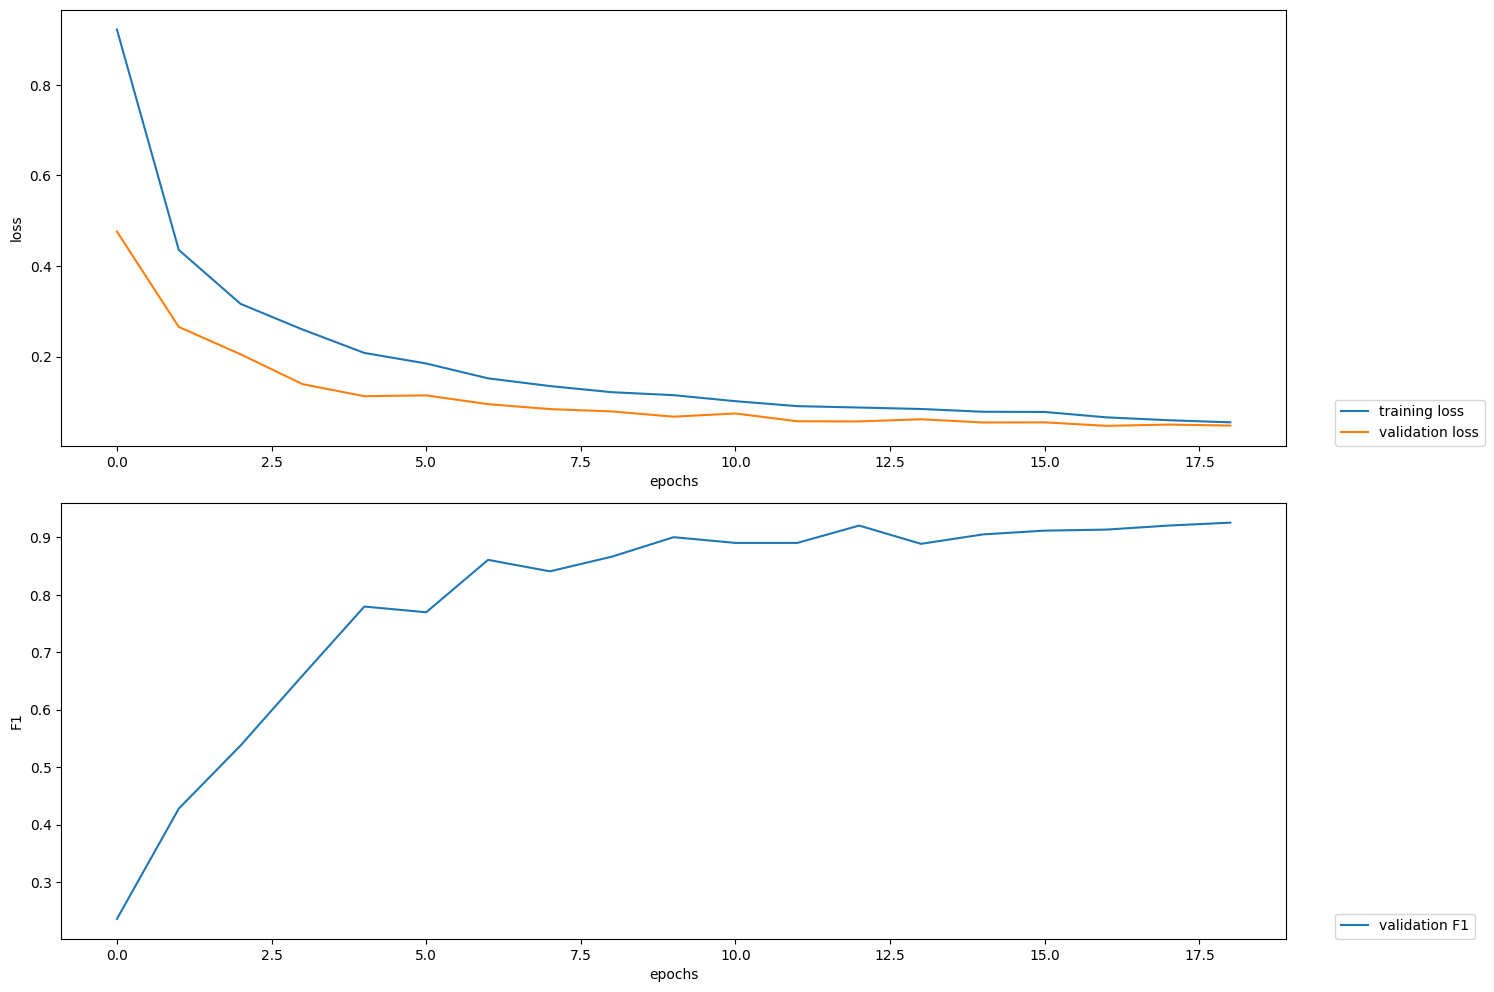

2023-11-23 09:51:31,886 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-manual/Flair-manual-model-ES-all/weights.png


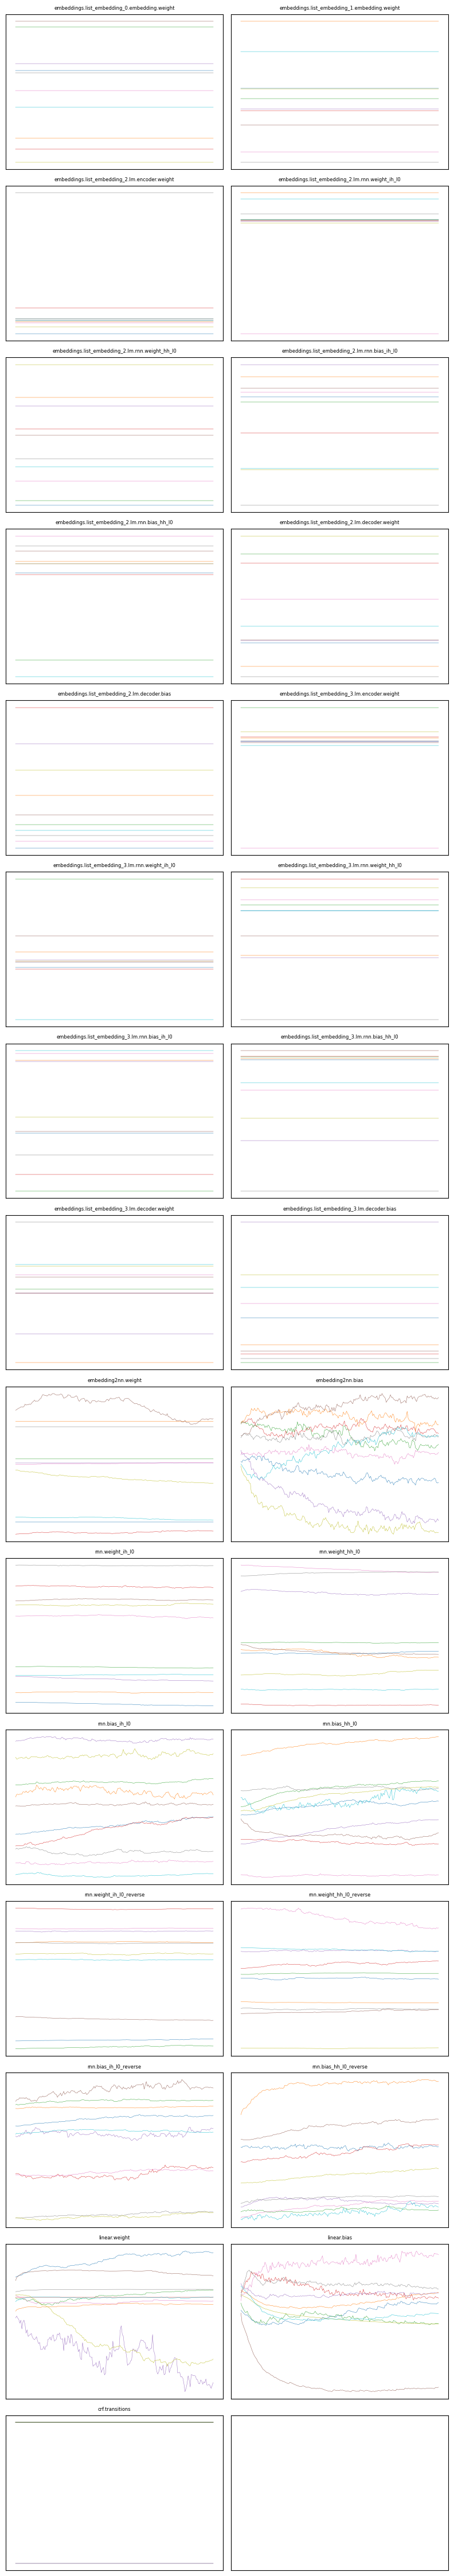

In [ ]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')